<center><h1>Técnicas de Inteligencia Artificial</header1></center>

Presentado por: Hector Ismael Cedeño Zambrano  <br>
Fecha: 17/7/2022

# Importación de librerias necesarias

In [19]:
#Para esta actividad se importarán las siguientes librerías:
#Se importa la librería panda
import pandas as pd
##Se importa la librería numpy
import numpy as np
#Se importa la librería seaborn
import seaborn as sns

## Cargar el Dataset

In [20]:
#Código para cargar el Dataset
#leemos el dataset insurance
df=pd.read_csv('insurance.csv')

In [21]:
#visualización de los 10 primeros datos
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [22]:
#desplegar la descripción del dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Descripción de la fuente del Dataset


El dataset contiene información de 1339 datos personsales de costos médicos. Dicho dataset contiene 7 atributos, incluida una característica de clase (objetivo) que indica los cargos del costos médico facturado. El significado comercial de cada columna (atributo) en los datos es el siguiente:

**charges** Continuo. Edad del beneficiario principal.

**age:** Continuo. Contratista de seguros género, femenino, masculino.

**sex:** Categoría. Cuantos KMS se uso el auto.

**bmi:** Continuo.  Índice de masa corporal, que proporciona una comprensión del cuerpo, pesos que son relativamente altos o bajos en relación con la altura, índice objetivo de peso corporal (kg / m ^ 2) utilizando la relación entre altura y peso, idealmente 18,5 a 24,9.

**children:** Continuo.  Número de niños cubiertos por el seguro de salud / Número de dependientes.

**smoker:** Categorical. Si fuma o no.

**region:** Categorical. El área residencial del beneficiario en los EE. UU., noreste, sureste, suroeste, noroeste.

Link del dataset: https://www.kaggle.com/mirichoi0218/insurance

## Explique el problema a resolver. 
Se requiere crear un modelo de aprendizaje automático que permita predecir los costos médicos individuales del seguro de salud en función de sus especificaciones. Para lo cuál se utilizará el dataset descrito en el apartado anterior, el cuál contiene 1339 samples. Donde, la variable objetivo se denomina **"charges"**. Existen 6 variables de entrada llamadas: **age,** **sex,** **bmi,** **children,** **region,** **smoker.**

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


### Número de instancias en total

In [23]:
#Código que responde a la descripción anterior
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

### Número de atributos de entrada, su significado y tipo

**charges** Continuo. Edad del beneficiario principal.

**age:** Continuo. Contratista de seguros género, femenino, masculino.

**sex:** Categoría. Cuantos KMS se uso el auto.

**bmi:** Continuo.  Índice de masa corporal, que proporciona una comprensión del cuerpo, pesos que son relativamente altos o bajos en relación con la altura, índice objetivo de peso corporal (kg / m ^ 2) utilizando la relación entre altura y peso, idealmente 18,5 a 24,9.

**children:** Continuo.  Número de niños cubiertos por el seguro de salud / Número de dependientes.

**smoker:** Categorical. Si fuma o no.

**region:** Categorical. El área residencial del beneficiario en los EE. UU., noreste, sureste, suroeste, noroeste.

In [24]:
#muestra la información (incluido el tipo de dato) de los 6 atributos de entrada.
df.drop('charges', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


### Mirando la distribución de la variable objetivo

<AxesSubplot:>

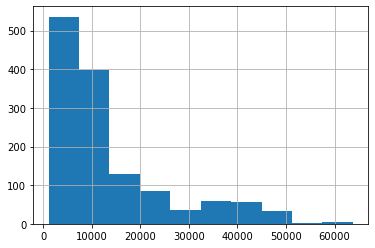

In [25]:
%matplotlib inline
#Crear gráfico de barras como la variable objetivo (tipo) continua.
df['charges'].hist()

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [26]:
#Transformación de las caracteristicas (mire el apartado Feature engineering del aula virtual)
# Variable objetivo y variables de entrada
VariableObjetivo=['charges']
df['sex']=df['sex'].map({'female':0, 'male':1})
df['smoker']=df['smoker'].map({'yes':0, 'no':1})
df['region']=df['region'].map({'southwest':0, 'northeast':1})
VariablesEntrada=['age', 'sex', 'bmi', 'children', 'smoker','region']

In [27]:
X=df[VariablesEntrada].values
y=df[VariableObjetivo].values

In [28]:
### Estandarización de la data ###
from sklearn.preprocessing import StandardScaler
VariablesEntradaScaler=StandardScaler()
VariableObjetivoScaler=StandardScaler()

In [29]:
#Almacenamiento del objeto de ajuste para referencia posterior
VariablesEntradaFit=VariablesEntradaScaler.fit(X)
VariableObjetivoFit=VariableObjetivoScaler.fit(y)

In [30]:
#Generación de los valores estandarizados de X e y
X=VariablesEntradaFit.transform(X)
y=VariableObjetivoFit.transform(y)

## División del dataset en datos de entrenamiento y datos de test 

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(936, 6)
(936, 1)
(402, 6)
(402, 1)


## Regresión Lineal

In [6]:
#Códo del modelo

In [7]:
#Entrenamiento

In [8]:
#Test

## Evaluación del Modelo

Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 